## Домашнее задание №2  Матричные нормы. PCA. SVD

### Задача 1
Пусть функция $f(x)$ трижды дифференцируема и $f(x)$ ее третья производная ограничены (локально ограничены): $|f(\xi)| < M_0$ и $|f'''(\xi)| < M_3$, тогда:

$\left|f'(x) - \frac{-3f(x)(1 + \epsilon) + 4f(x+h)(1 + \epsilon) - f(x+2h)(1 + \epsilon)}{2h}\right| = \left|f'(x) - \frac{-3f(x) + 4f(x) + 4hf'(x) + 2h^2 f''(x) + \frac{2h^3}{3} f'''(\xi_1) - f(x) - 2hf'(x) - 2h^2 f''(x) - \frac{4h^3}{3} f''(\xi_2)}{2h} - \frac{-3f(x)\epsilon + 4f(x+h)\epsilon - f(x+2h)\epsilon}{2h}\right| \leq h^2 M_3 + \frac{4 \epsilon M_0}{h}.$

Оптимальное $h$ такое, что $h^2 M_3 + \frac{4 \epsilon M_0}{h}$ минимально:

$2hM_3 = \frac{4 \epsilon M_0}{h^2} \Rightarrow h = \left(\frac{2 \epsilon M_0}{M_3}\right)^\frac{1}{3}.$

### Задача 2
$\forall x, y \in \mathbb{C} \quad \|x\|_2 \|y\|_2 = \sqrt{\sum\limits_{i=0}^{n} |x_i|^2} \sqrt{\sum\limits_{i=0}^{n} |y_i|^2} = \sqrt{\sum\limits_{i=0}^{n} |x_i|^2 \sum\limits_{i=0}^{n} |y_i|^2} = \sqrt{\sum\limits_{i=0}^{n} \sum\limits_{j=0}^{n} |x_i|^2 |y_j|^2} = \sqrt{\sum\limits_{i=0}^{n} \sum\limits_{j=0}^{n} |x_i|^2 |\overline{y_j}|^2} = \sqrt{\sum\limits_{i=0}^{n} \sum\limits_{j=0}^{n} |x_i \overline{y_j}|^2} = \|xy^*\|_F$

### Задача 3
#### а) $\|A\|_1$
$\frac{\|Ax\|_1}{\|x\|_1} = \frac{\sum\limits_{i=1}^n\left|\sum\limits_{j=1}^n a_{ij} x_j\right|}{\|x\|_1} \leq \frac{\sum\limits_{i=1}^n \sum\limits_{j=1}^n |a_{ij}||x_j|}{\|x\|_1} = \frac{\sum\limits_{i=1}^n |a_{ij}| \sum\limits_{j=1}^n |x_j|}{\|x\|_1} = \max\limits_j \sum\limits_{i=1}^n |a_{ij}|$

Оценка достигается при $x' = e_k = (0, \dots, 0, \underset{k}{1}, 0, \dots, 0)^T$, где $k$ - индекс на котором достигается максимум выше:

$\frac{\|Ax\|_1}{\|x\|_1} = \sum\limits_{i=1}^n\left|\sum\limits_{j=1}^n a_{ij} x'_j\right| = \sum\limits_{i=1}^n |a_{ik}| = \max\limits_j \sum\limits_{i=1}^n |a_{ij}|$

#### б) $\|A\|_\infty$

$\frac{\|Ax\|_\infty}{\|x\|_\infty} = \frac{\max\limits_i \left|\sum\limits_{j=1}^n a_{ij} x_j\right|}{\|x\|_\infty} \leq \frac{\max\limits_i |x_i| \max\limits_i \sum\limits_{j=1}^n |a_{ij}|}{\|x\|_\infty} = \max\limits_i \sum\limits_{j=1}^n |a_{ij}|$

Оценка достигается при $x' = (sign(a_{k0}), \dots, sign(a_{kn}))^T$, где $k$ - индекс на котором достигается максимум выше:

$\frac{\|Ax'\|_\infty}{\|x'\|_\infty} = \max\limits_i \left|\sum\limits_{j=1}^n a_{ij} x'_j\right| \geq \left|\sum\limits_{j=1}^n a_{kj} sign(a_{kj})\right| = \sum\limits_{j=1}^n |a_{kj}| = \max\limits_i \sum\limits_{j=1}^n |a_{ij}|$

### Задача 4
$Ax=b \\
A(x + \Delta x) = b + \Delta b \\
x = A^{-1}b \\
\Delta x = A^{-1} \Delta b \Rightarrow \|\Delta x\| = \|A^{-1} \Delta b\| \leq \|A^{-1}\|\|\Delta b\| \\
\frac{\|\Delta x\|}{\|x\|} \leq \frac{\|A^{-1}\|\|\Delta b\|}{\|A^{-1} b\|} = \frac{\|A^{-1}\|\|\Delta b\|}{\|A^{-1} b\|} \frac{\|b\|}{\|b\|} \leq \|A^{-1}\| \sup\limits_b \left(\frac{\|b\|}{\|A^{-1} b\|}\right) \frac{\|\Delta b\|}{\|b\|} = \|A^{-1}\| \sup\limits_x \left(\frac{\|Ax\|}{\|x\|}\right) \frac{\|\Delta b\|}{\|b\|} = \|A^{-1}\| \|A\| \frac{\|\Delta b\|}{\|b\|} \\
cond(A) = \|A^{-1}\| \|A\|$

### Задача 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

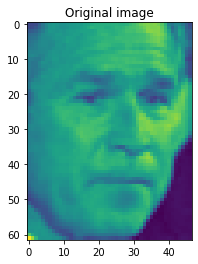

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70)
plt.imshow(lfw_people.images[0])
plt.title('Original image')
plt.show()

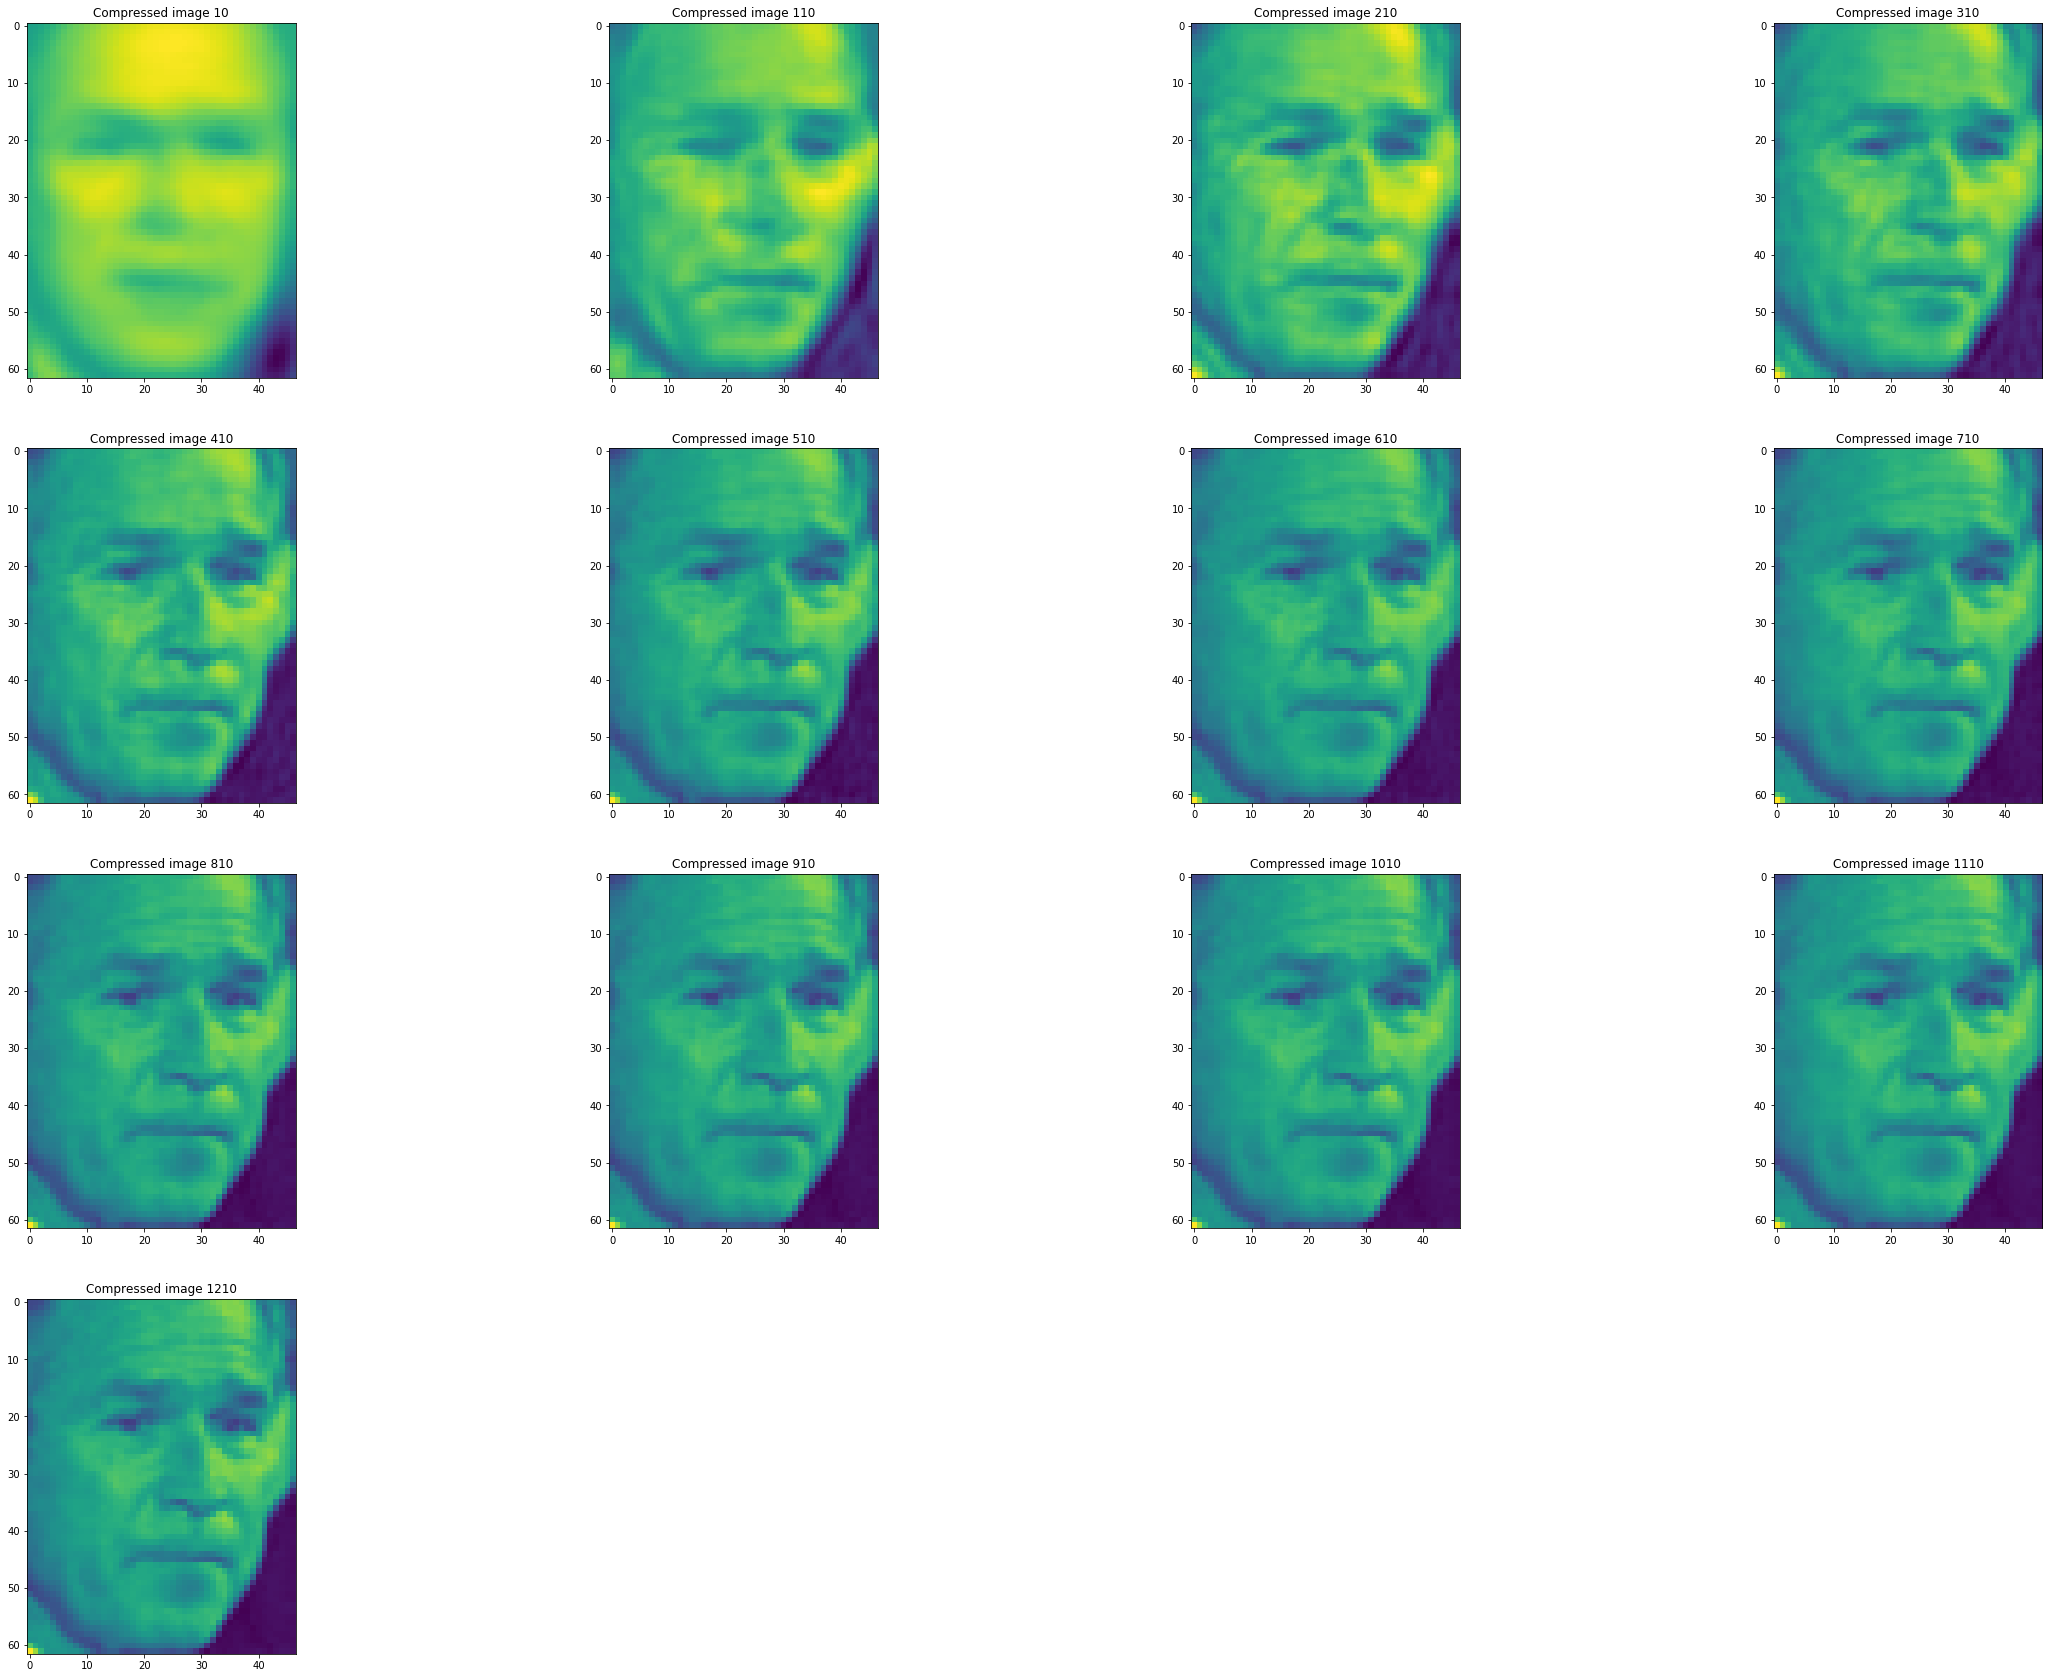

In [3]:
plt.figure(figsize=(40, 30))
comps = np.arange(10, 1217, 100)
errors = []

for i, n_comps in enumerate(comps):
    pca = PCA(n_comps)
    plt.subplot(4, 4, i + 1)
    proj = pca.inverse_transform(pca.fit_transform(lfw_people.data)[0])
    plt.imshow(proj.reshape(lfw_people.images[0].shape))
    plt.title('Compressed image ' + str(n_comps))
    errors.append(np.linalg.norm(proj - lfw_people.data[0]))

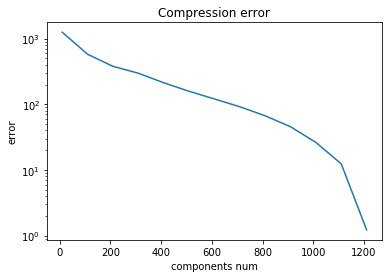

In [4]:
plt.plot(comps, errors)
plt.yscale('log')
plt.title('Compression error')
plt.xlabel('components num')
plt.ylabel('error')
plt.show()